# Initial Broadband EDA & Data Explorations

## Datasets
1. Broadband data from https://github.com/BroadbandNow/Open-Data by zip
2. EBB (Emergency Broadband Benefit) total # of enrolled households by zip: https://www.usac.org/about/emergency-broadband-benefit-program/emergency-broadband-benefit-program-enrollments-and-claims-tracker/#enrollment-by-zip
3. Zip to Census tracts & block groups file from Missouri Census Data Center Geocorr Tool: https://mcdc.missouri.edu/applications/geocorr2018.html
4. TODO: Add Census data pulled down from API

## Problem to Explore
If a state is motivated to increase broadband access, how can they? Specifically ...
- What regions are currently not served by any broadband?
- What regions have the slowest speeds?
- What regions have the highest prices?
- And what's the socioeconomic & demographic makeup of these regions?

## Data Loading & Merging

In [52]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [53]:
## Helper function to pad zip codes with 0s

def pad_zip(x):
    zipcode = str(x)
    while len(zipcode) < 5:
        zipcode = "0" + zipcode
    return zipcode

In [54]:
broadband = pd.read_csv("../data/broadband_now/broadband_data_opendatachallenge.csv", 
                        converters={'Zip' : lambda x: pad_zip(x)})
broadband

,Zip,Population,County,State,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,...,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1
0,29620,12934.0,Abbeville,South Carolina,6.0,0.0,11.0,5.0,3.0,7.0,...,536.35,98%,40.00,6.0,0.0,8.0,3.0,3.0,3.0,3.0
1,29628,2759.0,Abbeville,South Carolina,4.0,0.0,8.0,3.0,2.0,5.0,...,126.06,95%,40.00,4.0,0.0,6.0,3.0,3.0,3.0,3.0
2,29638,2944.0,Abbeville,South Carolina,6.0,1.0,13.0,4.0,4.0,6.0,...,222.35,95%,40.00,5.0,0.0,7.0,2.0,2.0,2.0,2.0
3,29639,1742.0,Abbeville,South Carolina,3.0,0.0,8.0,3.0,3.0,5.0,...,223.75,90%,40.00,3.0,0.0,5.0,3.0,3.0,3.0,3.0
4,70516,1546.0,Acadia,Louisiana,4.0,3.0,12.0,2.0,2.0,4.0,...,9.41,33%,69.99,4.0,2.0,8.0,2.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32603,99781,167.0,Yukon-Koyukuk,Alaska,1.0,0.0,2.0,0.0,0.0,0.0,...,0.51,0,NaN,1.0,0.0,2.0,0.0,0.0,0.0,0.0
32604,99788,69.0,Yukon-Koyukuk,Alaska,1.0,0.0,2.0,0.0,0.0,0.0,...,NaN,0,NaN,1.0,0.0,2.0,0.0,0.0,0.0,0.0
32605,99774,78.0,Yukon-Koyukuk,Alaska,1.0,0.0,2.0,0.0,0.0,0.0,...,NaN,0,NaN,1.0,0.0,2.0,0.0,0.0,0.0,0.0
32606,99767,24.0,Yukon-Koyukuk,Alaska,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [55]:
## Read in the EBB dataset but keep zip codes formatted correctly
ebb = pd.read_excel("../data/ebb/EBB_Enrollment_by_Zip5_12_30.xlsx", header =4, usecols="A,B", nrows=30182,
                   converters={'5 DIGIT ZIP CODE' : lambda x: pad_zip(x)})
## Rename columns to standardize across datasetss
ebb.columns = ["Zip", "Total_Enrolled_Households"]
ebb

,Zip,Total_Enrolled_Households
0,00601,2727
1,00602,4175
2,00603,5908
3,00606,919
4,00610,2375
...,...,...
30177,99922,12
30178,99925,6
30179,99926,132
30180,99929,34


In [56]:
## Read in the Microsoft Broadband Usage Dataset
msft_usage = pd.read_csv("../data/USBroadbandUsagePercentages-master/dataset/broadband_data_zipcode.csv",
                   converters={'POSTAL CODE' : lambda x: pad_zip(x)})

## Rename the column to Zip to match other datasets
msft_usage = msft_usage.rename(columns={'POSTAL CODE' : "Zip"})
msft_usage

,ST,COUNTY NAME,COUNTY ID,Zip,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,SC,Abbeville,45001,29639,0.948,0.034,0.110,0.002
1,SC,Abbeville,45001,29620,0.398,0.002,0.007,0.000
2,SC,Abbeville,45001,29659,0.206,0.152,0.608,0.043
3,SC,Abbeville,45001,29638,0.369,0.010,0.031,-0.001
4,SC,Abbeville,45001,29628,0.221,0.014,0.043,0.000
...,...,...,...,...,...,...,...,...
32730,TX,Zavala,48507,78839,0.514,0.006,0.018,-0.001
32731,TX,Zavala,48507,78872,0.071,0.020,0.061,0.000
32732,SD,Ziebach,46137,57622,0.000,0.110,0.406,0.031
32733,SD,Ziebach,46137,57748,0.000,0.065,0.228,0.013


In [57]:
## Zips to Census Tracts dataset

## Notes about the columns of this dataset
#### afact - decimal portion of the source area contained in the target area 

zips = pd.read_csv("../data/zips_to_census.csv", converters={'zcta5' : lambda x: str(x)}, skiprows = [1])
zips

,zcta5,county,tract,bg,cntyname,zipname,pop10,afact
0,38769,5041,9501.00,1,Desha AR,"Rosedale, MS",2,1.0000
1,65729,5089,9603.00,1,Marion AR,"Pontiac, MO",36,1.0000
2,65733,5009,7902.00,2,Boone AR,"Protem, MO",5,0.0230
3,65733,5089,9603.00,4,Marion AR,"Protem, MO",212,0.9770
4,65761,5089,9603.00,4,Marion AR,"Theodosia, MO",93,1.0000
...,...,...,...,...,...,...,...,...
3645,72959,5143,111.03,2,Washington AR,"Winslow, AR",610,0.2190
3646,75556,5091,210.00,8,Miller AR,"Bloomburg, TX",26,1.0000
3647,99999,5093,110.00,4,Mississippi AR,99999,3,0.5000
3648,99999,5093,112.00,2,Mississippi AR,99999,2,0.3333


In [58]:
np.unique(broadband.Zip).shape

(32608,)

In [59]:
np.unique(ebb["Zip"]).shape

(30182,)

In [60]:
np.unique(msft_usage["Zip"]).shape

(32653,)

There are different numbers of zip codes in the different datasets. We'll need to investigate why some zip codes are missing.

### Data Merging

In [61]:
df = pd.merge(broadband, ebb, how='left', on='Zip')
df = pd.merge(df, msft_usage, how='right', on='Zip')
df

,Zip,Population,County,State,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,...,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,29639,1742.0,Abbeville,South Carolina,3.0,0.0,8.0,3.0,3.0,5.0,...,3.0,3.0,21.0,SC,Abbeville,45001,0.948,0.034,0.110,0.002
1,29620,12934.0,Abbeville,South Carolina,6.0,0.0,11.0,5.0,3.0,7.0,...,3.0,3.0,542.0,SC,Abbeville,45001,0.398,0.002,0.007,0.000
2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SC,Abbeville,45001,0.206,0.152,0.608,0.043
3,29638,2944.0,Abbeville,South Carolina,6.0,1.0,13.0,4.0,4.0,6.0,...,2.0,2.0,68.0,SC,Abbeville,45001,0.369,0.010,0.031,-0.001
4,29628,2759.0,Abbeville,South Carolina,4.0,0.0,8.0,3.0,2.0,5.0,...,3.0,3.0,102.0,SC,Abbeville,45001,0.221,0.014,0.043,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,78839,8578.0,Zavala,Texas,3.0,3.0,11.0,1.0,1.0,4.0,...,1.0,0.0,552.0,TX,Zavala,48507,0.514,0.006,0.018,-0.001
32731,78872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TX,Zavala,48507,0.071,0.020,0.061,0.000
32732,57622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SD,Ziebach,46137,0.000,0.110,0.406,0.031
32733,57748,318.0,Ziebach,South Dakota,4.0,1.0,9.0,2.0,2.0,5.0,...,2.0,0.0,6.0,SD,Ziebach,46137,0.000,0.065,0.228,0.013


In [62]:
df.columns

Index(['Zip', 'Population', 'County', 'State', 'WiredCount_2020',
       'Fwcount_2020', 'AllProviderCount_2020', 'Wired25_3_2020',
       'Wired100_3_2020', 'All25_3_2020', 'All100_3', 'TestCount',
       'AverageMbps', 'FastestAverageMbps', '%Access to Terrestrial Broadband',
       'Lowest Priced Terrestrial Broadband Plan', 'WiredCount_2015',
       'Fwcount_2015', 'AllProviderCount_2015', 'Wired25_3_2015',
       'Wired100_3_2015', 'All25_3_2015', 'All100_3.1',
       'Total_Enrolled_Households', 'ST', 'COUNTY NAME', 'COUNTY ID',
       'BROADBAND USAGE', 'ERROR RANGE (MAE)(+/-)', 'ERROR RANGE (95%)(+/-)',
       'MSD'],
      dtype='object')

In [63]:
## Let's drop some of the duplication columns: County Name, ST
df = df.drop(columns=['State', 'County'])
df

,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,...,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,29639,1742.0,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,...,3.0,3.0,21.0,SC,Abbeville,45001,0.948,0.034,0.110,0.002
1,29620,12934.0,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,...,3.0,3.0,542.0,SC,Abbeville,45001,0.398,0.002,0.007,0.000
2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SC,Abbeville,45001,0.206,0.152,0.608,0.043
3,29638,2944.0,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,...,2.0,2.0,68.0,SC,Abbeville,45001,0.369,0.010,0.031,-0.001
4,29628,2759.0,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,...,3.0,3.0,102.0,SC,Abbeville,45001,0.221,0.014,0.043,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32730,78839,8578.0,3.0,3.0,11.0,1.0,1.0,4.0,1.0,1392.0,...,1.0,0.0,552.0,TX,Zavala,48507,0.514,0.006,0.018,-0.001
32731,78872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,TX,Zavala,48507,0.071,0.020,0.061,0.000
32732,57622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SD,Ziebach,46137,0.000,0.110,0.406,0.031
32733,57748,318.0,4.0,1.0,9.0,2.0,2.0,5.0,2.0,NaN,...,2.0,0.0,6.0,SD,Ziebach,46137,0.000,0.065,0.228,0.013


In [69]:
## Creating an AR df of just AR zipcodes that were in the zips df
ar_df = df[df.ST=="AR"]
ar_df

,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,...,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
890,72003,746.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,164.0,...,1.0,0.0,8.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
891,72048,114.0,1.0,1.0,6.0,0.0,0.0,2.0,0.0,NaN,...,0.0,0.0,1.0,AR,Arkansas,5001,1.000,0.197,0.869,0.022
892,72055,849.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,2.0,...,0.0,0.0,4.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
893,72073,1139.0,1.0,1.0,7.0,0.0,0.0,2.0,0.0,12.0,...,0.0,0.0,21.0,AR,Arkansas,5001,0.086,0.027,0.086,0.001
894,72026,393.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,6.0,...,0.0,0.0,3.0,AR,Arkansas,5001,0.000,0.065,0.228,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32516,72857,1430.0,2.0,1.0,8.0,1.0,1.0,4.0,3.0,124.0,...,1.0,0.0,23.0,AR,Yell,5149,0.435,0.023,0.072,0.000
32517,72833,4384.0,2.0,0.0,6.0,1.0,1.0,3.0,2.0,444.0,...,2.0,1.0,42.0,AR,Yell,5149,0.500,0.010,0.031,-0.001
32518,72827,187.0,1.0,0.0,5.0,1.0,1.0,3.0,2.0,NaN,...,0.0,0.0,8.0,AR,Yell,5149,0.185,0.110,0.406,0.031
32519,72860,375.0,3.0,0.0,7.0,2.0,1.0,4.0,2.0,3.0,...,1.0,0.0,4.0,AR,Yell,5149,0.258,0.050,0.170,0.007


Note: According to an online search, the state of Arkansas covers 705 zip codes but our data only covers 589... Why are some missing?

In [70]:
## Get all the columns

df.columns

Index(['Zip', 'Population', 'WiredCount_2020', 'Fwcount_2020',
       'AllProviderCount_2020', 'Wired25_3_2020', 'Wired100_3_2020',
       'All25_3_2020', 'All100_3', 'TestCount', 'AverageMbps',
       'FastestAverageMbps', '%Access to Terrestrial Broadband',
       'Lowest Priced Terrestrial Broadband Plan', 'WiredCount_2015',
       'Fwcount_2015', 'AllProviderCount_2015', 'Wired25_3_2015',
       'Wired100_3_2015', 'All25_3_2015', 'All100_3.1',
       'Total_Enrolled_Households', 'ST', 'COUNTY NAME', 'COUNTY ID',
       'BROADBAND USAGE', 'ERROR RANGE (MAE)(+/-)', 'ERROR RANGE (95%)(+/-)',
       'MSD'],
      dtype='object')

## EDA

Now we have a df dataset with the broadband data and the total number of enrolled households in EBB by Zip.

Some explorations below.

### Exploring Counts of Missing Data

In [74]:
print("There are    ", df.shape[0], "   TOTAL rows of data")
for col in df.columns:
    print(col, "    is missing    ",sum(df[col].isna()), "    rows of data")

There are     32735    TOTAL rows of data
Zip     is missing     0     rows of data
Population     is missing     3250     rows of data
WiredCount_2020     is missing     3250     rows of data
Fwcount_2020     is missing     3250     rows of data
AllProviderCount_2020     is missing     3250     rows of data
Wired25_3_2020     is missing     3250     rows of data
Wired100_3_2020     is missing     3250     rows of data
All25_3_2020     is missing     3250     rows of data
All100_3     is missing     3250     rows of data
TestCount     is missing     6553     rows of data
AverageMbps     is missing     6553     rows of data
FastestAverageMbps     is missing     6553     rows of data
%Access to Terrestrial Broadband     is missing     3253     rows of data
Lowest Priced Terrestrial Broadband Plan     is missing     6310     rows of data
WiredCount_2015     is missing     3252     rows of data
Fwcount_2015     is missing     3252     rows of data
AllProviderCount_2015     is missing     3

In [75]:
print("There are    ", ar_df.shape[0], "   AR TOTAL rows of data")
for col in df.columns:
    print(col, "    is missing    ",sum(ar_df[col].isna()), "    rows of data")

There are     589    AR TOTAL rows of data
Zip     is missing     0     rows of data
Population     is missing     64     rows of data
WiredCount_2020     is missing     64     rows of data
Fwcount_2020     is missing     64     rows of data
AllProviderCount_2020     is missing     64     rows of data
Wired25_3_2020     is missing     64     rows of data
Wired100_3_2020     is missing     64     rows of data
All25_3_2020     is missing     64     rows of data
All100_3     is missing     64     rows of data
TestCount     is missing     202     rows of data
AverageMbps     is missing     202     rows of data
FastestAverageMbps     is missing     202     rows of data
%Access to Terrestrial Broadband     is missing     64     rows of data
Lowest Priced Terrestrial Broadband Plan     is missing     213     rows of data
WiredCount_2015     is missing     64     rows of data
Fwcount_2015     is missing     64     rows of data
AllProviderCount_2015     is missing     64     rows of data
Wired2

### Relationship between price of lowest plan and the total number of enrolled households in EBB

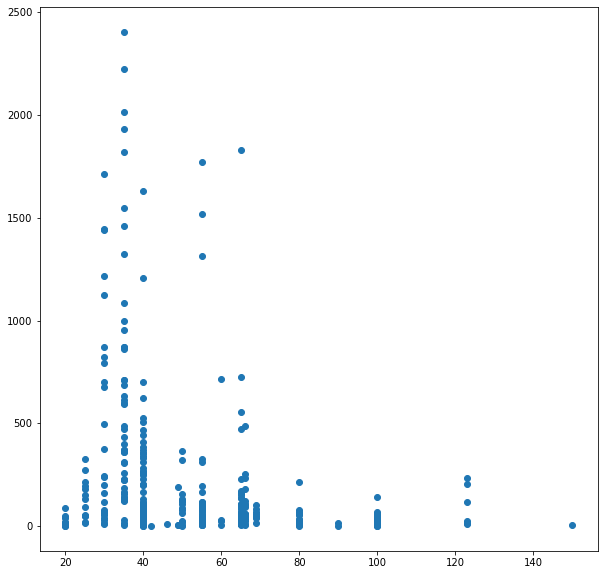

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(ar_df["Lowest Priced Terrestrial Broadband Plan"], ar_df["Total_Enrolled_Households"])

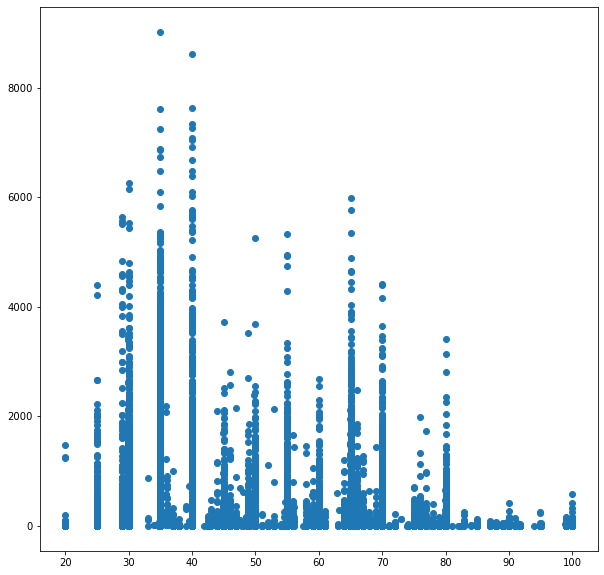

In [37]:
## Filter dataset to only plans < $150 or 100 (i.e. remove outliers)
temp = df[df["Lowest Priced Terrestrial Broadband Plan"] <= 100]

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(temp["Lowest Priced Terrestrial Broadband Plan"], temp["Total_Enrolled_Households"])

In [48]:
grouped_by_price = df[["Lowest Priced Terrestrial Broadband Plan", "Total_Enrolled_Households"]].groupby(["Lowest Priced Terrestrial Broadband Plan"]).sum()
grouped_by_price = grouped_by_price.reset_index()
grouped_by_price

,Lowest Priced Terrestrial Broadband Plan,Total_Enrolled_Households
0,19.95,1771.0
1,20.00,2998.0
2,24.99,35905.0
3,25.00,64501.0
4,28.99,6177.0
...,...,...
205,249.95,240.0
206,250.00,20.0
207,299.00,227.0
208,299.95,57.0


In [50]:
alt.Chart(grouped_by_price).mark_bar().encode(
 x= "Lowest Priced Terrestrial Broadband Plan",
 y = 'Total_Enrolled_Households').interactive()

alt.Chart(...)

In [51]:
## Grouping by price, aggregating population

grouped_by_price_pop = df[["Lowest Priced Terrestrial Broadband Plan", "Population"]].groupby(["Lowest Priced Terrestrial Broadband Plan"]).sum()
grouped_by_price_pop = grouped_by_price_pop.reset_index()
grouped_by_price_pop

,Lowest Priced Terrestrial Broadband Plan,Population
0,19.95,85931.0
1,20.00,67359.0
2,24.99,1140549.0
3,25.00,1934912.0
4,28.99,96190.0
...,...,...
205,249.95,18694.0
206,250.00,1146.0
207,299.00,7817.0
208,299.95,3570.0


In [53]:
alt.Chart(grouped_by_price_pop).mark_bar().encode(
 x= "Lowest Priced Terrestrial Broadband Plan",
 y = 'Population').interactive()

alt.Chart(...)

### Some questions to think about ...

- Why did so many households request EBB when the lowest priced plan was $35? Because that's the biggest population?

## EDA on Speeds

In [67]:
alt.Chart(ar_df).mark_circle().encode(
 x= "All100_3",
 y = '%Access to Terrestrial Broadband').interactive()

alt.Chart(...)

In [70]:
alt.Chart(ar_df).mark_circle().encode(
 x= "All100_3.1",
 y = '%Access to Terrestrial Broadband').interactive()

alt.Chart(...)